# Actividad 2 - Parte 1: Support Vector Machines (SVM)

**Instituto Tecnol√≥gico Superior de Atlixco**  
**Materia:** Aprendizaje Autom√°tico  
**Alumno:** Jos√© √Ångel Balbuena Palma

**Fecha:** Octubre 2025

## Objetivo
Comprender e implementar SVM evaluando c√≥mo los hiperpar√°metros C y kernel afectan el margen, vectores de soporte, fronteras de decisi√≥n y desempe√±o del modelo.

## 1. Importaci√≥n de Librer√≠as

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
import warnings
warnings.filterwarnings('ignore')
print("‚úì Librer√≠as cargadas")

‚úì Librer√≠as cargadas


# EJEMPLO 1: Hiperplano de Separaci√≥n
## 2. Generaci√≥n de Datos
Creamos datos sint√©ticos linealmente separables con `make_blobs`.

Datos generados: (40, 2)
Clase 0: 20, Clase 1: 20


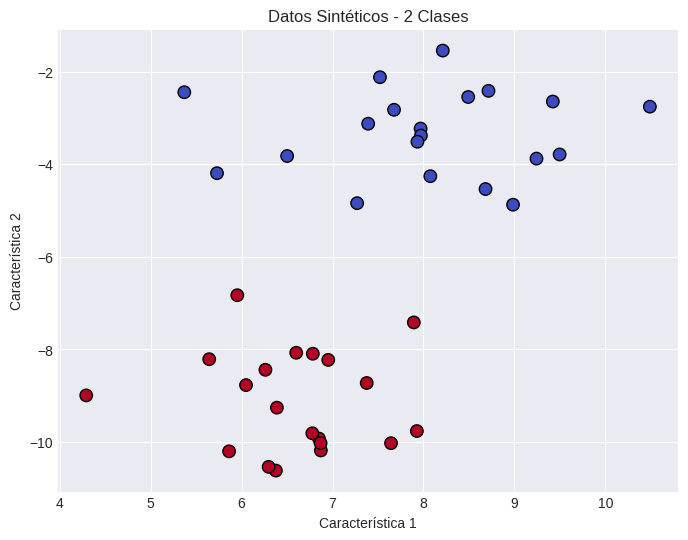

In [2]:
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
print(f"Datos generados: {X.shape}")
print(f"Clase 0: {np.sum(y==0)}, Clase 1: {np.sum(y==1)}")

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=80, edgecolors='k')
plt.xlabel('Caracter√≠stica 1')
plt.ylabel('Caracter√≠stica 2')
plt.title('Datos Sint√©ticos - 2 Clases')
plt.show()

## 3.1 Entrenamiento SVM Base
SVM con kernel lineal y C=0.1 (margen amplio).

In [3]:
clf_base = svm.SVC(kernel='linear', C=0.1)
clf_base.fit(X, y)

print(f"Vectores de soporte: {len(clf_base.support_vectors_)}")
print(f"Coeficientes (w): {clf_base.coef_}")
print(f"Intercepto (b): {clf_base.intercept_}")
print(f"Precisi√≥n: {clf_base.score(X, y)*100:.2f}%")

Vectores de soporte: 6
Coeficientes (w): [[-0.11378523 -0.54370072]]
Intercepto (b): [-2.62823566]
Precisi√≥n: 100.00%


## 4.1 Visualizaci√≥n del Hiperplano

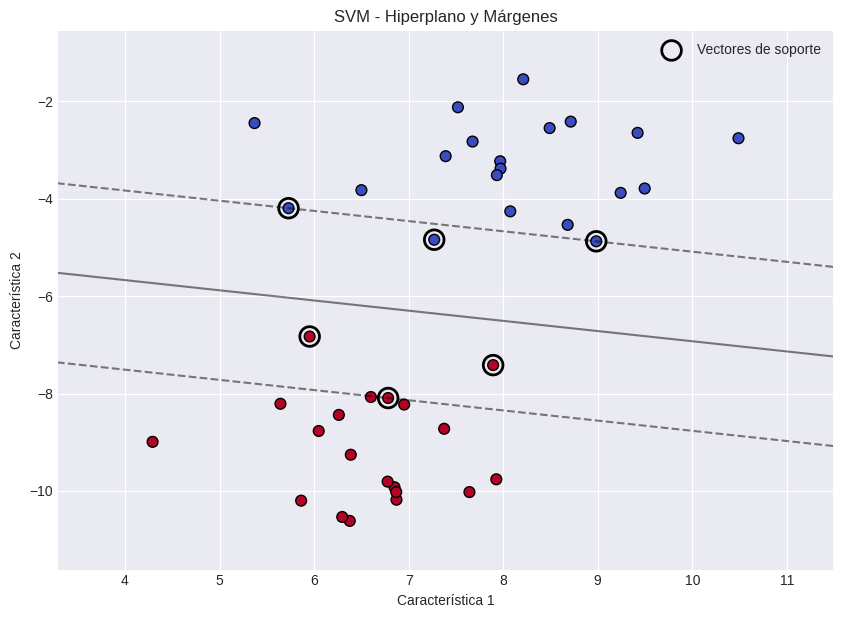

In [4]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=60, edgecolors='k')
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(clf_base, X, plot_method="contour",
    colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"], ax=ax)
ax.scatter(clf_base.support_vectors_[:,0], clf_base.support_vectors_[:,1],
    s=200, facecolors="none", edgecolors="black", linewidth=2, label="Vectores de soporte")
plt.xlabel('Caracter√≠stica 1')
plt.ylabel('Caracter√≠stica 2')
plt.title('SVM - Hiperplano y M√°rgenes')
plt.legend()
plt.show()

## 3.2 Entrenamiento SVM Base
SVM con kernel lineal y C = 10 (margen estrecho).

In [5]:
clf_base = svm.SVC(kernel='linear', C=10)
clf_base.fit(X, y)

print(f"Vectores de soporte: {len(clf_base.support_vectors_)}")
print(f"Coeficientes (w): {clf_base.coef_}")
print(f"Intercepto (b): {clf_base.intercept_}")
print(f"Precisi√≥n: {clf_base.score(X, y)*100:.2f}%")

Vectores de soporte: 3
Coeficientes (w): [[-0.2539717  -0.83806387]]
Intercepto (b): [-3.21132826]
Precisi√≥n: 100.00%


## 4.2 Visualizaci√≥n del Hiperplano

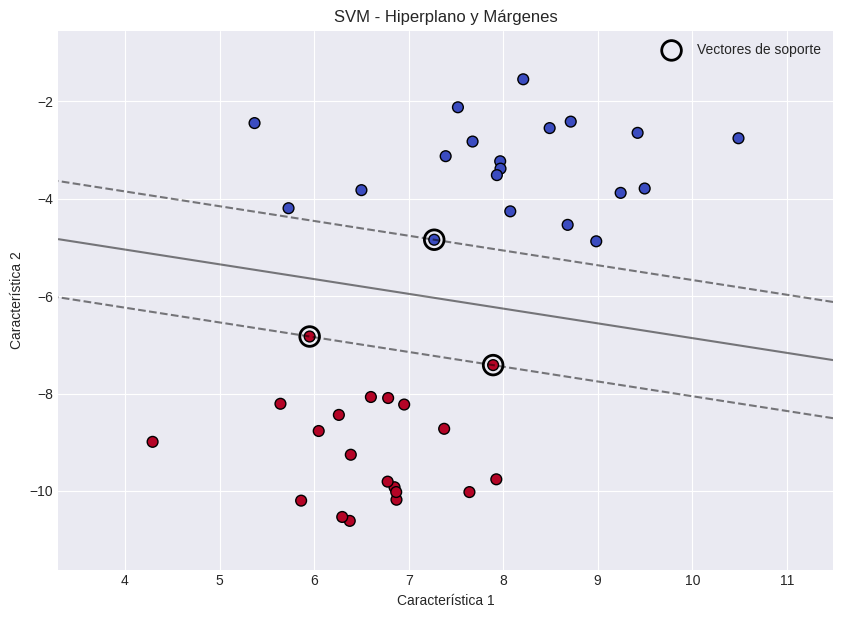

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=60, edgecolors='k')
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(clf_base, X, plot_method="contour",
    colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"], ax=ax)
ax.scatter(clf_base.support_vectors_[:,0], clf_base.support_vectors_[:,1],
    s=200, facecolors="none", edgecolors="black", linewidth=2, label="Vectores de soporte")
plt.xlabel('Caracter√≠stica 1')
plt.ylabel('Caracter√≠stica 2')
plt.title('SVM - Hiperplano y M√°rgenes')
plt.legend()
plt.show()

## 3.3 Entrenamiento SVM Base
SVM con kernel sigmoid c = 0.1

In [7]:
# Con kernel sigmoid, solo puedes acceder a cierta informaci√≥n
clf_base = svm.SVC(kernel='sigmoid', C=0.1)
clf_base.fit(X, y)

print(f"Vectores de soporte: {len(clf_base.support_vectors_)}")
print(f"√çndices de vectores de soporte: {clf_base.support_}")
print(f"Intercepto (b): {clf_base.intercept_}")
print(f"Precisi√≥n: {clf_base.score(X, y)*100:.2f}%")

# Tambi√©n puedes ver otros atributos √∫tiles:
print(f"N√∫mero de vectores de soporte por clase: {clf_base.n_support_}")
print(f"Coeficientes duales: {clf_base.dual_coef_}")

Vectores de soporte: 40
√çndices de vectores de soporte: [ 1  3  5  6  7  8  9 12 15 16 18 19 24 25 28 33 34 35 36 38  0  2  4 10
 11 13 14 17 20 21 22 23 26 27 29 30 31 32 37 39]
Intercepto (b): [-0.21493814]
Precisi√≥n: 100.00%
N√∫mero de vectores de soporte por clase: [20 20]
Coeficientes duales: [[-0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1
  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
   0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]


## 4.3 Visualizaci√≥n del Hiperplano

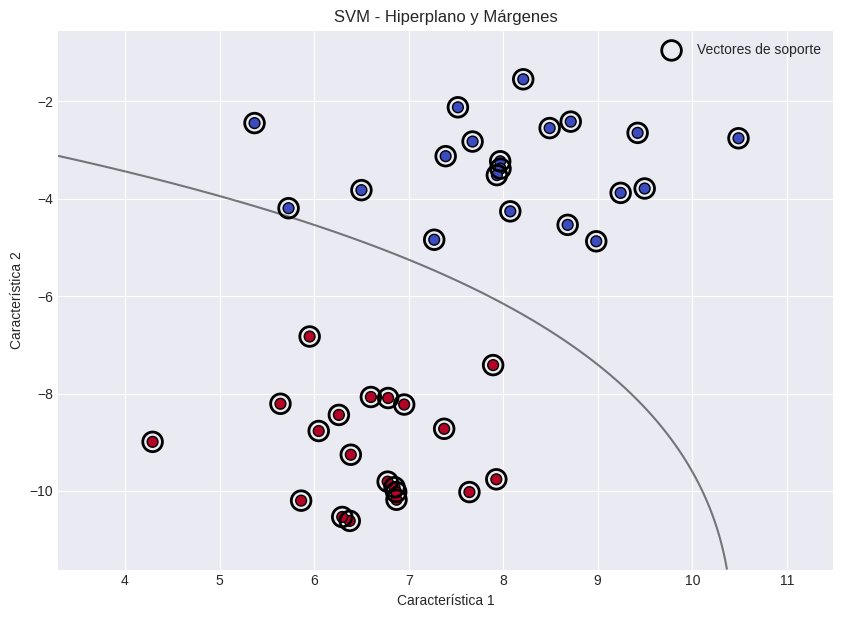

In [8]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=60, edgecolors='k')
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(clf_base, X, plot_method="contour",
    colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"], ax=ax)
ax.scatter(clf_base.support_vectors_[:,0], clf_base.support_vectors_[:,1],
    s=200, facecolors="none", edgecolors="black", linewidth=2, label="Vectores de soporte")
plt.xlabel('Caracter√≠stica 1')
plt.ylabel('Caracter√≠stica 2')
plt.title('SVM - Hiperplano y M√°rgenes')
plt.legend()
plt.show()

## 3.4 Entrenamiento SVM Base
SVM con kernel sigmoid 

In [9]:
# Con kernel sigmoid, solo puedes acceder a cierta informaci√≥n
clf_base = svm.SVC(kernel='sigmoid', C=10)
clf_base.fit(X, y)

print(f"Vectores de soporte: {len(clf_base.support_vectors_)}")
print(f"√çndices de vectores de soporte: {clf_base.support_}")
print(f"Intercepto (b): {clf_base.intercept_}")
print(f"Precisi√≥n: {clf_base.score(X, y)*100:.2f}%")

# Tambi√©n puedes ver otros atributos √∫tiles:
print(f"N√∫mero de vectores de soporte por clase: {clf_base.n_support_}")
print(f"Coeficientes duales: {clf_base.dual_coef_}")

Vectores de soporte: 10
√çndices de vectores de soporte: [ 1  8 16 19 28  4 10 11 26 30]
Intercepto (b): [-6.35973269]
Precisi√≥n: 100.00%
N√∫mero de vectores de soporte por clase: [5 5]
Coeficientes duales: [[-10.         -10.         -10.          -5.73961367 -10.
   10.          10.           5.73961367  10.          10.        ]]


## 4.4 Visualizaci√≥n del Hiperplano

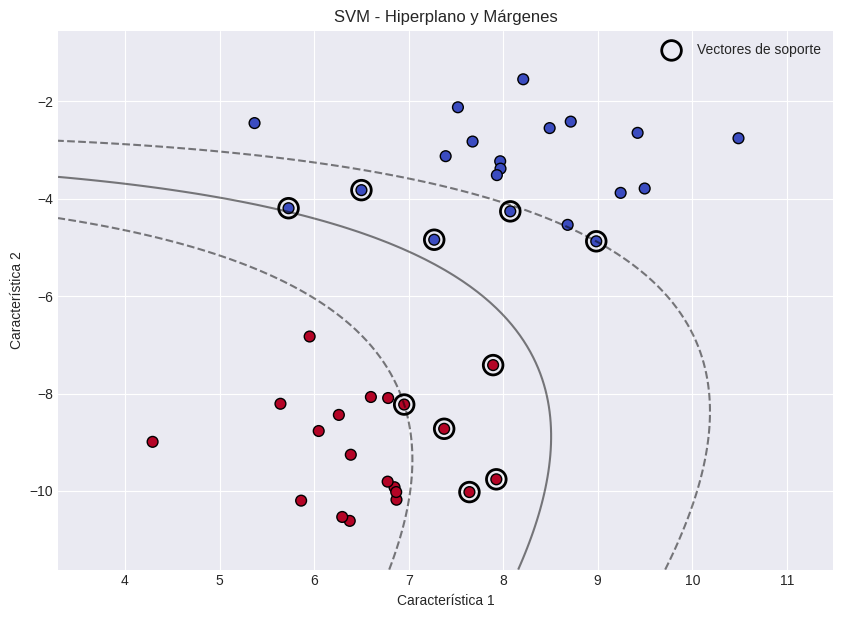

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=60, edgecolors='k')
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(clf_base, X, plot_method="contour",
    colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"], ax=ax)
ax.scatter(clf_base.support_vectors_[:,0], clf_base.support_vectors_[:,1],
    s=200, facecolors="none", edgecolors="black", linewidth=2, label="Vectores de soporte")
plt.xlabel('Caracter√≠stica 1')
plt.ylabel('Caracter√≠stica 2')
plt.title('SVM - Hiperplano y M√°rgenes')
plt.legend()
plt.show()

## An√°lisis del Ejemplo 1: Hiperplano de Separaci√≥n (Datos Lineales)

El Ejemplo 1 utiliza datos **sint√©ticos linealmente separables** (20 de Clase 0 y 20 de Clase 1)
### 1.1. Efecto del Par√°metro $C$ (Kernel Lineal)

El par√°metro $C$ controla la penalizaci√≥n por errores y afecta el margen y el n√∫mero de Vectores de Soporte (SV).

| Configuraci√≥n | $C$ | Precisi√≥n (Train) | Vectores de Soporte (SV) | Observaci√≥n |
| :---: | :---: | :---: | :---: | :---: |
| `linear_C0.1` | **0.1** | 100.00% | **6** | Margen m√°s **amplio** (suave). |
| `linear_C10` | **10** | 100.00% | **3**  | Margen m√°s **estrecho** (estricto). |

**Conclusi√≥n sobre $C$ (Datos Lineales):**
Para datos perfectamente separables, el **kernel lineal** funciona de manera √≥ptima. Un **$C$ bajo ($0.1$)** genera un margen m√°s amplio con m√°s SV. Un **$C$ alto ($10$)** genera un margen m√°s estrecho con menos SV.

### 1.2. Efecto del Tipo de Kernel (Sigmoid)

Al usar un kernel no lineal en datos lineales, la frontera se vuelve curva:

| Configuraci√≥n | $C$ | Precisi√≥n (Train) | Vectores de Soporte (SV) | Forma de la Frontera |
| :---: | :---: | :---: | :---: | :---: |
| `sigmoid_C0.1` | 0.1 | 100.00% | **40**  | Frontera **Sigmoidal** (curva). |
| `sigmoid_C10` | 10 | 100.00% | **10**  | Frontera **Sigmoidal** m√°s ajustada. |

**Conclusi√≥n sobre Kernels (Datos Lineales):**
El **Kernel Sigmoide** genera una frontera de decisi√≥n **innecesariamente compleja y curva**. Esto es ineficiente; por ejemplo, con $C=0.1$ todos los puntos se convierten en SV. **El kernel lineal es la elecci√≥n correcta** para este tipo de datos.

# EJEMPLO 2: Dataset Real ESL.mixture
## 5. Carga de Datos Reales

Dataset: (200, 3)
         X1        X2  y
0  2.526093  0.321050  0
1  0.366954  0.031462  0
2  0.768219  0.717486  0
3  0.693436  0.777194  0
4 -0.019837  0.867254  0

Distribuci√≥n: y
0    100
1    100
Name: count, dtype: int64


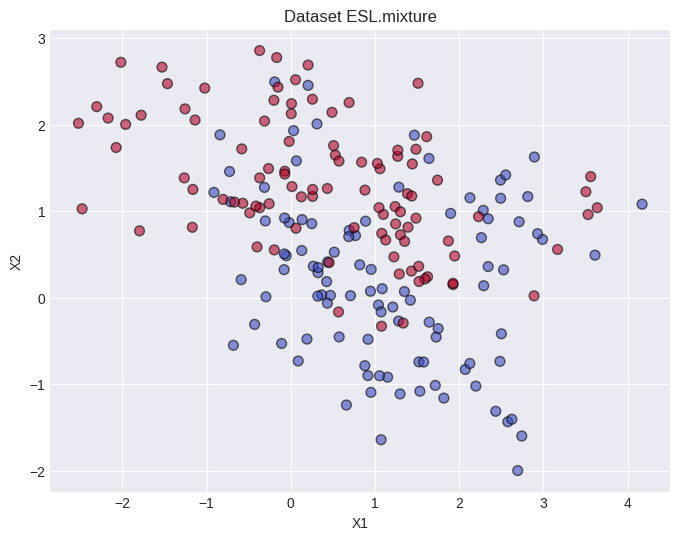

In [11]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python/master/data/ESL.mixture.csv'
data = pd.read_csv(url)
print(f"Dataset: {data.shape}")
print(data.head())
print(f"\nDistribuci√≥n: {data['y'].value_counts()}")

X_data = data[['X1','X2']].values
y_data = data['y'].values

plt.figure(figsize=(8,6))
plt.scatter(X_data[:,0], X_data[:,1], c=y_data, cmap='coolwarm', alpha=0.6, s=50, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset ESL.mixture')
plt.show()

## 6. Divisi√≥n de Datos

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")

Train: 160, Test: 40


# 1.3 MODIFICACIONES: Diferentes C y Kernels
## 7. Entrenamiento con Todas las Configuraciones

In [13]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 10]
results = {}

for C in C_values:
    for kernel in kernels:
        key = f"{kernel}_C{C}"
        model = svm.SVC(kernel=kernel, C=C, gamma='scale')
        model.fit(X_train, y_train)
        
        train_acc = model.score(X_train, y_train)
        test_acc = model.score(X_test, y_test)
        n_sv = len(model.support_vectors_)
        
        results[key] = {
            'model': model, 'kernel': kernel, 'C': C,
            'train_acc': train_acc, 'test_acc': test_acc, 'n_sv': n_sv
        }
        print(f"{key}: Train={train_acc:.3f}, Test={test_acc:.3f}, SV={n_sv}")

print("\n‚úì Entrenamiento completado")

linear_C0.1: Train=0.719, Test=0.775, SV=112
poly_C0.1: Train=0.650, Test=0.600, SV=123
rbf_C0.1: Train=0.744, Test=0.750, SV=140
sigmoid_C0.1: Train=0.713, Test=0.775, SV=124
linear_C10: Train=0.713, Test=0.775, SV=101
poly_C10: Train=0.662, Test=0.600, SV=115
rbf_C10: Train=0.819, Test=0.850, SV=84
sigmoid_C10: Train=0.637, Test=0.600, SV=62

‚úì Entrenamiento completado


## 8. Tabla Comparativa

In [14]:
df_results = pd.DataFrame([{
    'Config': k, 'Kernel': v['kernel'], 'C': v['C'],
    'Train': v['train_acc'], 'Test': v['test_acc'], 'SV': v['n_sv']
} for k,v in results.items()])
df_results = df_results.sort_values('Test', ascending=False)
print("\nRESULTADOS COMPLETOS:")
print(df_results.to_string(index=False))


RESULTADOS COMPLETOS:
      Config  Kernel    C   Train  Test  SV
     rbf_C10     rbf 10.0 0.81875 0.850  84
 linear_C0.1  linear  0.1 0.71875 0.775 112
  linear_C10  linear 10.0 0.71250 0.775 101
sigmoid_C0.1 sigmoid  0.1 0.71250 0.775 124
    rbf_C0.1     rbf  0.1 0.74375 0.750 140
   poly_C0.1    poly  0.1 0.65000 0.600 123
    poly_C10    poly 10.0 0.66250 0.600 115
 sigmoid_C10 sigmoid 10.0 0.63750 0.600  62


## 9. Visualizaci√≥n Comparativa

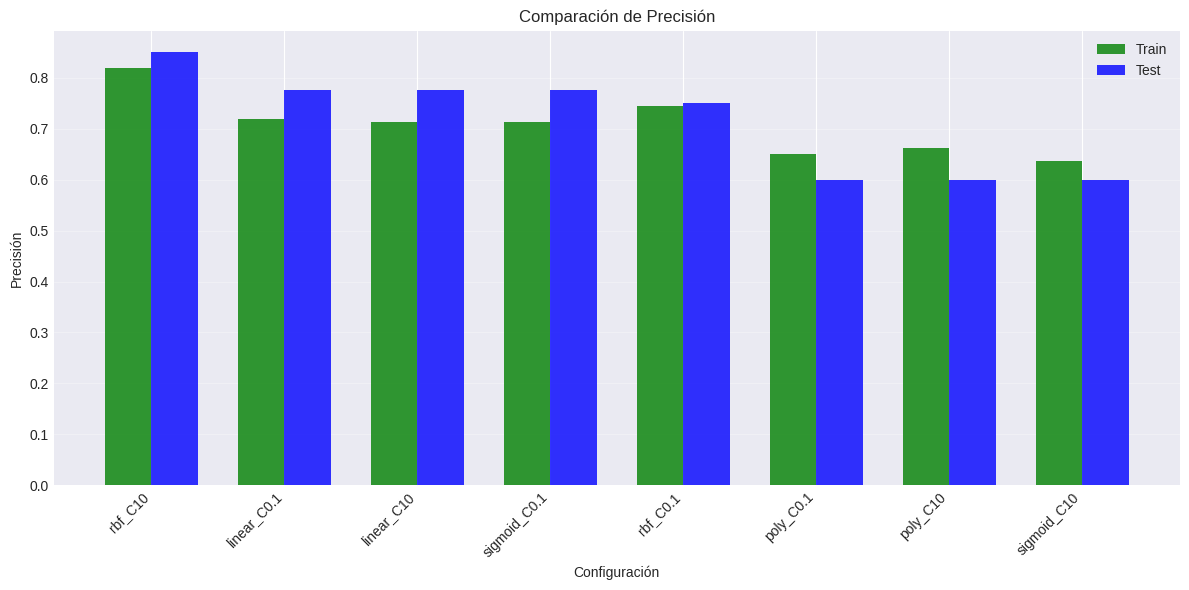

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(len(df_results))
width = 0.35
ax.bar(x-width/2, df_results['Train'], width, label='Train', alpha=0.8, color='green')
ax.bar(x+width/2, df_results['Test'], width, label='Test', alpha=0.8, color='blue')
ax.set_xlabel('Configuraci√≥n')
ax.set_ylabel('Precisi√≥n')
ax.set_title('Comparaci√≥n de Precisi√≥n')
ax.set_xticks(x)
ax.set_xticklabels(df_results['Config'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 10. Fronteras de Decisi√≥n - Todas las Configuraciones

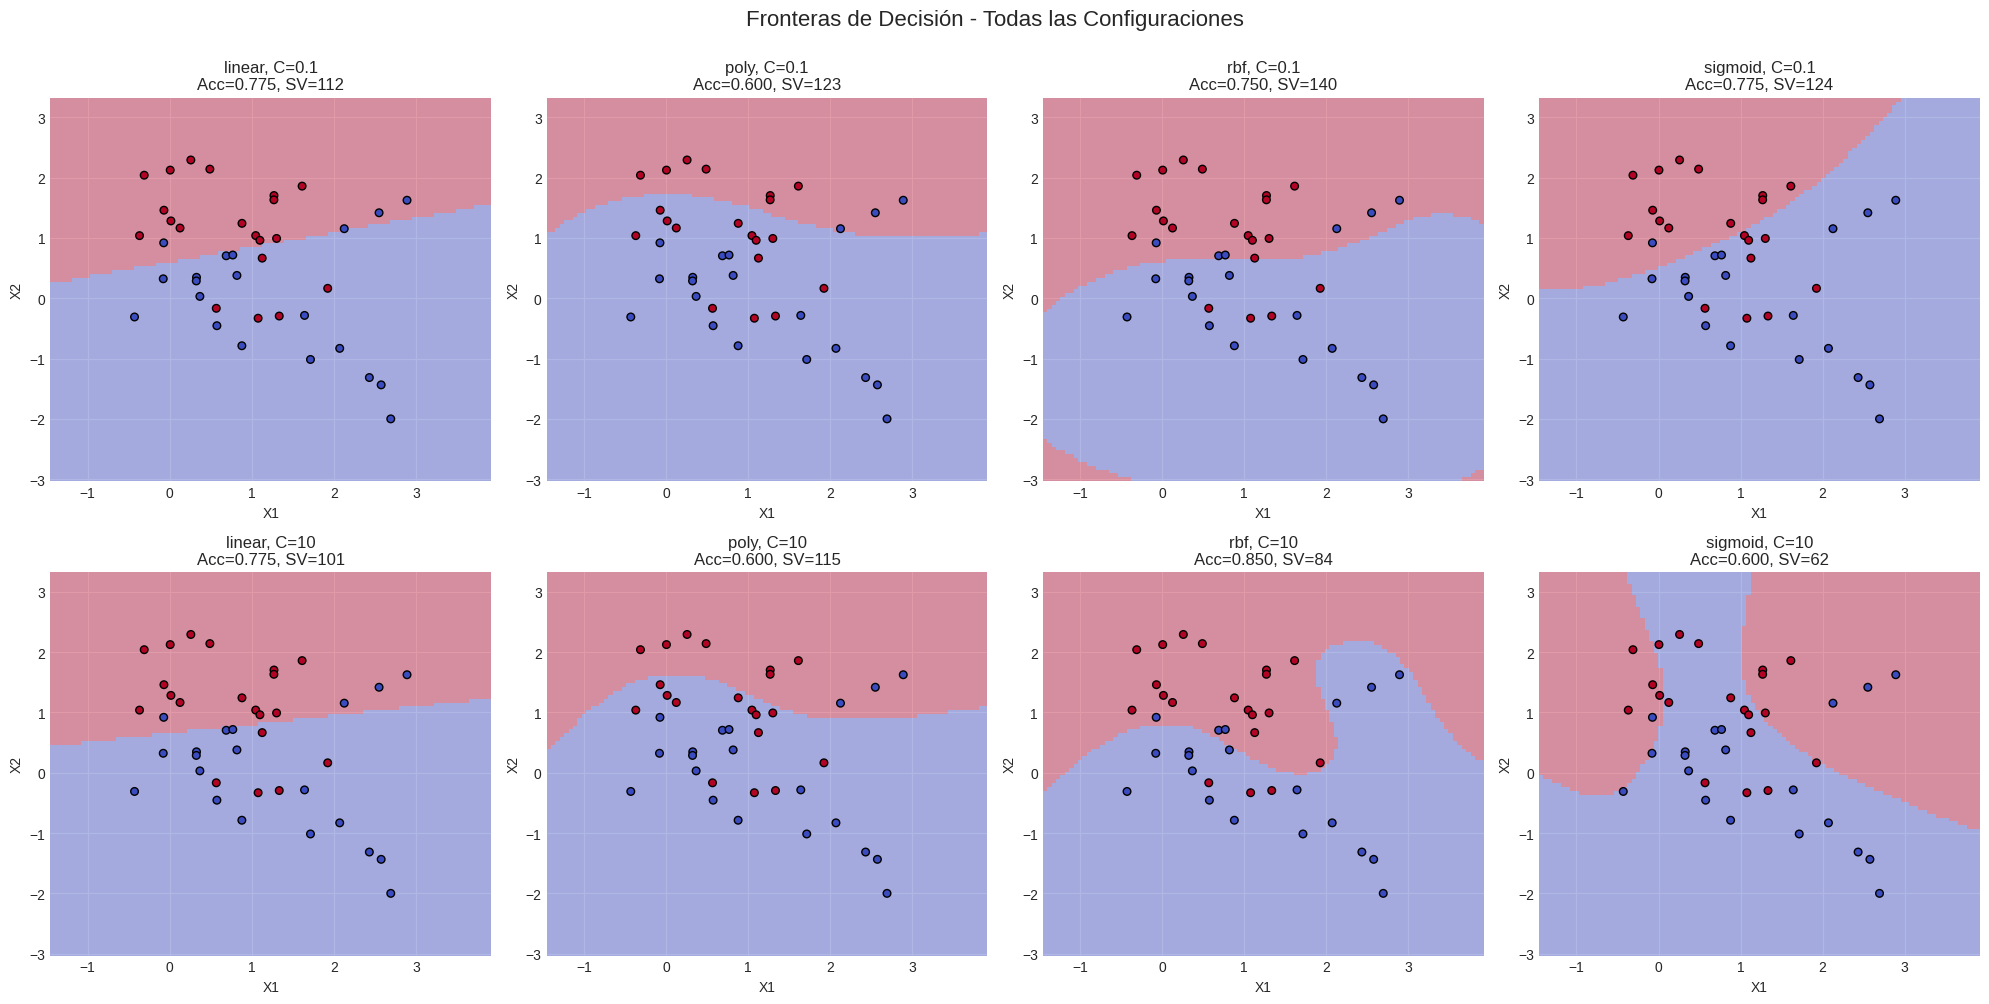

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
axes = axes.ravel()

for idx, (key, info) in enumerate(results.items()):
    ax = axes[idx]
    DecisionBoundaryDisplay.from_estimator(info['model'], X_test, alpha=0.4, ax=ax,
        response_method="predict", plot_method="pcolormesh", cmap='coolwarm')
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, s=30, edgecolors='k', cmap='coolwarm')
    ax.set_title(f"{info['kernel']}, C={info['C']}\nAcc={info['test_acc']:.3f}, SV={info['n_sv']}")
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

plt.suptitle('Fronteras de Decisi√≥n - Todas las Configuraciones', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

# 1.4 AN√ÅLISIS DE CAMBIOS
## 11. Efecto del Par√°metro C

In [17]:
print("="*70)
print("AN√ÅLISIS: EFECTO DEL PAR√ÅMETRO C")
print("="*70)

for kernel in kernels:
    low = results[f"{kernel}_C0.1"]
    high = results[f"{kernel}_C10"]
    print(f"\n{kernel.upper()}:")
    print(f"  C=0.1: Test={low['test_acc']:.3f}, SV={low['n_sv']}")
    print(f"  C=10:  Test={high['test_acc']:.3f}, SV={high['n_sv']}")
    print(f"  Cambio SV: {high['n_sv']-low['n_sv']:+d}")

print("""
\nOBSERVACIONES:
- C BAJO (0.1): Margen amplio, m√°s vectores de soporte, menor sobreajuste
- C ALTO (10): Margen estrecho, menos vectores de soporte, mayor riesgo de sobreajuste
""")

AN√ÅLISIS: EFECTO DEL PAR√ÅMETRO C

LINEAR:
  C=0.1: Test=0.775, SV=112
  C=10:  Test=0.775, SV=101
  Cambio SV: -11

POLY:
  C=0.1: Test=0.600, SV=123
  C=10:  Test=0.600, SV=115
  Cambio SV: -8

RBF:
  C=0.1: Test=0.750, SV=140
  C=10:  Test=0.850, SV=84
  Cambio SV: -56

SIGMOID:
  C=0.1: Test=0.775, SV=124
  C=10:  Test=0.600, SV=62
  Cambio SV: -62


OBSERVACIONES:
- C BAJO (0.1): Margen amplio, m√°s vectores de soporte, menor sobreajuste
- C ALTO (10): Margen estrecho, menos vectores de soporte, mayor riesgo de sobreajuste



## 12. An√°lisis por Kernel

üìà An√°lisis del Ejemplo 2: Dataset Real ESL.mixture (Datos No Lineales)

El Ejemplo 2 utiliza el **Dataset ESL.mixture**, que es **no linealmente separable**.

### Resultados Comparativos de Precisi√≥n (Test)

| Config | Kernel | $C$ | Precisi√≥n (Train) | Precisi√≥n (Test) | SV |
| :---: | :---: | :---: | :---: | :---: | :---: |
| **rbf\_C10** | **RBF** | **10.0** | **0.819** | **0.850** | **84** |
| linear\_C0.1 | Linear | 0.1 | 0.719 | 0.775 | 112 |
| linear\_C10 | Linear | 10.0 | 0.713 | 0.775 | 101 |
| sigmoid\_C0.1 | Sigmoid | 0.1 | 0.713 | 0.775 | 124 |
| rbf\_C0.1 | RBF | 0.1 | 0.744 | 0.750 | 140 |
| poly\_C0.1 | Poly | 0.1 | 0.650 | 0.600 | 123 |
| poly\_C10 | Poly | 10.0 | 0.662 | 0.600 | 115 |
| sigmoid\_C10 | Sigmoid | 10.0 | 0.637 | 0.600 | 62 |

###  Efecto del Kernel (Datos No Lineales)

* **RBF:** Es el **m√°s vers√°til** y funcion√≥ mejor para datos no lineales. Logr√≥ la **mejor precisi√≥n (0.850)**, generando fronteras complejas y adaptables.
* **Linear:** Es interpretable y simple, pero su **frontera de l√≠nea recta** limita su precisi√≥n en datos no lineales (0.775).
* **Poly y Sigmoid:** Obtuvieron los peores resultados para esta distribuci√≥n (0.600). El Sigmoid tiene un uso limitado y es menos estable.

### Efecto del Par√°metro $C$ (Datos No Lineales)

* **RBF:** Un **$C$ alto (10)** mejor√≥ la precisi√≥n (0.850). Esto significa que un margen m√°s estricto fue necesario para capturar la complejidad de los datos no lineales.
* **Sigmoid:** Un **$C$ alto (10)** redujo la precisi√≥n dr√°sticamente de 0.775 a 0.600, lo que indica que el margen estrecho llev√≥ a un **riesgo de sobreajuste** o un peor ajuste en este kernel.
* **General:** Un $C$ alto reduce los Vectores de Soporte (menos SV) en todos los kernels.

---

## 13. Matrices de Confusi√≥n (Top 4)

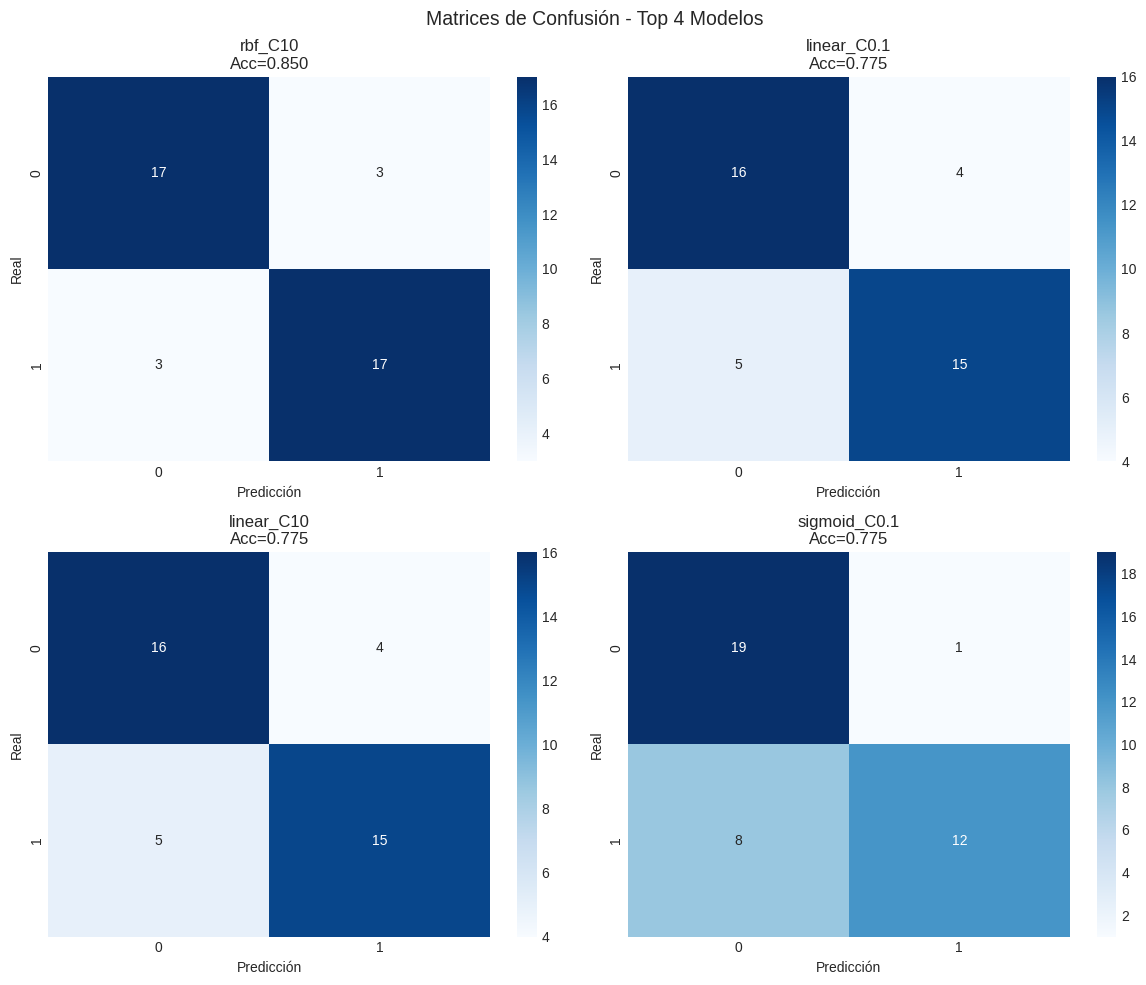

In [18]:
top4 = df_results.head(4)['Config'].values
fig, axes = plt.subplots(2,2, figsize=(12,10))
axes = axes.ravel()

for idx, config in enumerate(top4):
    info = results[config]
    y_pred = info['model'].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"{config}\nAcc={info['test_acc']:.3f}")
    axes[idx].set_ylabel('Real')
    axes[idx].set_xlabel('Predicci√≥n')

plt.suptitle('Matrices de Confusi√≥n - Top 4 Modelos', fontsize=14)
plt.tight_layout()
plt.show()

## 14. CONCLUSIONES


## Conclusiones Finales - Support Vector Machines

### Impacto de Hiperpar√°metros

1.  **Efecto del Par√°metro $C$:**
    * $C$ bajo $\to$ Margen **amplio**, **m√°s SV**, mejor generalizaci√≥n.
    * $C$ alto $\to$ Margen **estrecho**, **menos SV**, riesgo de sobreajuste.
2.  **Comparaci√≥n de Kernels:**
    * **RBF:** El m√°s vers√°til, mejor para datos no lineales.
    * **Linear:** Simple, eficiente, interpretable (para datos lineales).
    * **Poly:** Bueno para relaciones polin√≥micas espec√≠ficas.

### Mejor Modelo

La mejor configuraci√≥n para el dataset no lineal (`ESL.mixture`) fue el **RBF con $C=10$**, logrando una precisi√≥n en test del **85.0%**.

### Recomendaciones

* Comenzar con el **Kernel RBF** como l√≠nea base (*baseline*).
* Usar **validaci√≥n cruzada** para optimizar el valor de $C$.
* Monitorear la diferencia entre la precisi√≥n de entrenamiento y la de prueba para detectar sobreajuste.